# Tarea 4 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

## Convergencia de $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ 

### Método de Newton

El siguiente código sirve para dar aproximaciones a la raíz del polinomio $x^3 - x^2 - x - 1$ usando el método de Newton.
Usando wolframalpha se halla que la única raíz que tiene es aproximadamente $r=1.124992$ como notaremos en la siguiente línea de código que arroja el valor de la expresión dada por el programa anteriormente mencionado:

In [70]:
r=(1/3)*(1+(19-3*sqrt(33))^(1/3)+(19+3*sqrt(33))^(1/3))
return r

1.839286755214161

Con esto en mente propondremos un programa en Julia que realice lo mismo que hace wolframalpha tomando la expresión en general para el método de Newton y la función f(x):

Si tenemos la función $f(x)=P_n(x)$ con $P_n(x)$ un polinomio de grado $n$ y tiene una raíz $s_n$ de tal forma que la raíz aproximada en la iteración $n+1$ será:

$x_{n+1}=x_n-\displaystyle\frac{f(x)}{f'(x)}$

Siendo el código propuesto el siguiente:

In [54]:
Pkg.add("PyPlot")

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [26]:
#Definimos la función 'raizdelpolinomio' para realizar la iteración con método de Newton que pide dos variables: 'x0' es el valor inicial de la iteración, 'j' es la cantidad de iteraciones a realizar por el ciclo for y tiene que ser un número natural
function raizdelpolinomio(x0,j)
    #Damos valor a r como la raíz del polinomio para evitar cargar con la expresión en todo el código
    r=(1/3)*(1+(19-3*sqrt(33))^(1/3)+(19+3*sqrt(33))^(1/3))
    #Procedemos a declarar la función con la haremos la iteración y corresponde a la expresión de cociente de h(x)/h'(x) descrita en el texto anterior
    f(x)=complex((x*x*x)-(x*x)-x-1)/complex((3*x*x)-(2*x)-1)
    #Proponemos la función 'error(x)' la cuál nos dará el error relativo asociado de nuestra medición
    error(x)=(complex(x-r))/r
    #Evaluamos f(x) en x0 y usamos dicho valor en la igualdad de la variable a, la cual es igual a la expresión x_n+1 enunciada anteriormente
    a=x0-f(x0)
    #Aqui se evalua el error relativo en x=a y se guarda dicho valor en la variable b
    b=error(a)
    #Damos la lista de ceros que generará nuestra iteración
    list=zeros(Complex64,j);
    #Aquí se corre el ciclo for de i=1 a i=j
    for i in 1:j
        #Redefinimos los valores de a y b
        a=a-f(a)
        b=error(a)
        #Guardamos los valores iterados en la siguiente lista
        list[i]=a
    end
     #Regresa la lista de ceros que generó la función
    return list
#Fin de la función
end    

raizdelpolinomio (generic function with 1 method)

In [27]:
#Prueba
raizdelpolinomio(2,20)

20-element Array{Complex{Float32},1}:
 1.83954-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im
 1.83929-0.0im

In [28]:
using PyPlot

In [29]:
#Vamos a hacer nuestra aproximación usando 20 iteraciones con puntos iniciales 2, 1.5, 1.25 y 1.75 
list1=raizdelpolinomio(2,20);
list2=raizdelpolinomio(1.5,20);
list3=raizdelpolinomio(1.25,20);
list4=raizdelpolinomio(1.75,20);

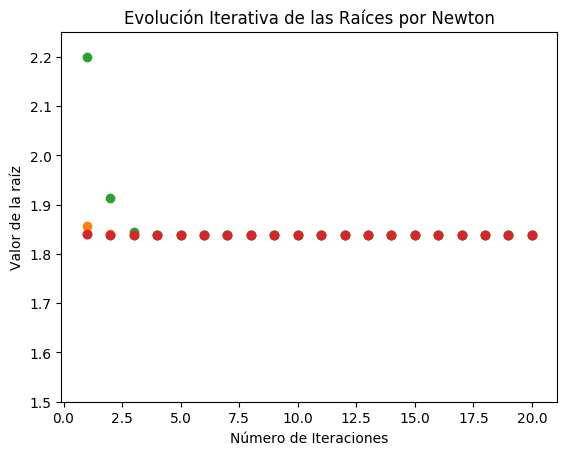

In [30]:
title("Evolución Iterativa de las Raíces por Newton")
xlabel("Número de Iteraciones")
ylabel("Valor de la raíz")
ylim(1.5,2.25)
scatter(1:20,list1)
scatter(1:20,list2)
scatter(1:20,list3)
scatter(1:20,list4)
show();

In [31]:
#Definimos la función 'errorraizdelpolinomio' para realizar la iteración con método de Newton que pide dos variables: 'x0' es el valor inicial de la iteración, 'j' es la cantidad de iteraciones a realizar por el ciclo for y tiene que ser un número natural
function errorraizdelpolinomio(x0,j)
    #Damos valor a r como la raíz del polinomio para evitar cargar con la expresión en todo el código
    r=(1/3)*(1+(19-3*sqrt(33))^(1/3)+(19+3*sqrt(33))^(1/3))
    #Procedemos a declarar la función con la haremos la iteración y corresponde a la expresión de cociente de h(x)/h'(x) descrita en el texto anterior
    f(x)=complex((x*x*x)-(x*x)-x-1)/complex((3*x*x)-(2*x)-1)
    #Proponemos la función 'error(x)' la cuál nos dará el error relativo asociado de nuestra medición
    error(x)=complex(x-r)/r
    #Evaluamos f(x) en x0 y usamos dicho valor en la igualdad de la variable a, la cual es igual a la expresión x_n+1 enunciada anteriormente
    a=x0-f(x0)
    #Aqui se evalua el error relativo en x=a y se guarda dicho valor en la variable b
    b=error(a)
    #Damos la lista de error relativo asociado a los ceros que generará nuestra iteración
    list=zeros(Complex64,j);
    #Aquí se corre el ciclo for de i=1 a i=j
    for i in 1:j
        #Redefinimos los valores de a y b
        a=a-f(a)
        b=error(a)
        #Guardamos los valores iterados del error en la siguiente lista
        list[i]=b
    end
     #Regresa la lista de errores relativos que generó la función
    return list
#Fin de la función
end 

errorraizdelpolinomio (generic function with 1 method)

In [32]:
errorraizdelpolinomio(2,20)

20-element Array{Complex{Float32},1}:
  0.00014014-0.0im
  2.98234f-8-0.0im
 1.44868f-15-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im
 1.20723f-16-0.0im

In [33]:
using PyPlot

In [34]:
#Vamos a hacer nuestra aproximación usando 20 iteraciones con puntos iniciales 2, 1.5, 1.25 y 1.75 
list5=errorraizdelpolinomio(2,20);
list6=errorraizdelpolinomio(1.5,20);
list7=errorraizdelpolinomio(1.25,20);
list8=errorraizdelpolinomio(1.75,20);

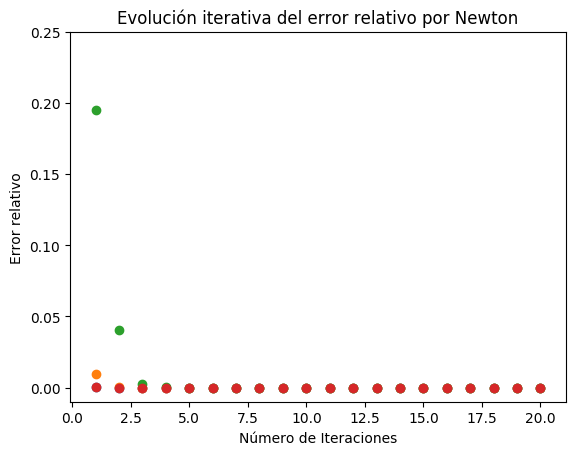

In [35]:
title("Evolución iterativa del error relativo por Newton")
xlabel("Número de Iteraciones")
ylabel("Error relativo")
ylim(-0.01,0.25)
scatter(1:20,list5)
scatter(1:20,list6)
scatter(1:20,list7)
scatter(1:20,list8)
show();

Notamos que los valores para el error relativo y la aproximación dada son muy cercanos a la raíz real.

### Método de bisección

Ahora daremos un código que nos calcule las raíces del polinomio $x^3 - x^2 - x - 1$ por método de bisección puesto que dado $f(x)=x^3 - x^2 - x - 1$ sabemos que es continua en cualquier intervalo en los reales.

El algoritmo a seguir una vez dado el intervalo $[a,b]$ que contenga la raíz de nuestro interés:
* Calcular el punto medio $p$ y evaluarlo en $f$
* Teniendo el intervalo partido en dos ahora hay que saber en cuál de los subintervalos hubo un cambio de signo pues debido al Teorema de Valor Intermedio sabremos que en ese subintervalo está la raíz. Se analiza entonces $f(a)f(p)\ $ y $\ f(b)f(p)$ buscando el intervalo donde no haya cambio de signo para poder redefinir el intervalo donde trabajaremos
* Salvar el valor aproximado de la raíz $p$ en una lista para ver su evolución conforme la iteración avance
* Realizar esto tantas veces como se haya pedido en la declaración de variables de $f$ usando una variable de control para el ciclo for

He aquí dicha función.

In [36]:
#Llamaremos a la función 'biseccion' con tres variables: a es el valor mínimo del intervalo, b es el valor máximo y j el número de iteraciones a realizar. Recordemos que el método trabaja con intervalos cerrados.
function biseccion(a,b,j)
    #Encontramos el punto medio en el intervalo inicial dado [a.b]
    p=(a+b)/2
    #Declaramos la función f(x) que es igual al polinomio en cuestión
    f(x)=x^3-x-2-x-1
    #Damos a conocer que enlistaremos los resultados iterativos de nuestra función
    list=zeros(Complex64,j);
    #Aqui está el ciclo for que rige la iteración donde construiremos los intervalos anidados para encerrar a la raíz, se detiene cuando i=j
    for i in 1:j
        #Primera evaluación del cambio de signo para a,p
        if  f(a)*f(p)>0
            #En caso de cumplirse que se  mantiene el signo se recorta el intervalo, el nuevo subintervalo tendría como valor mínimo la p estimada
            a=p
        end
        #Segunda comparación del cambio de signo ahora para p,b
        if f(b)*f(p)>0
        #En caso de cumplirse que se  mantiene el signo se recorta el intervalo, el nuevo subintervalo tendría como valor mánimo la p estimada
            b=p
        end
        #Con el nuevo intervalo definido se vuelve a estima su punto medio p
        p=(a+b)/2
        #Se guarda ese valor en lista y se procede a repetir el proceso tantas veces como j
        list[i]=p
    #Fin del ciclo for
    end
    #Da a conocer la lista de valores de p por cada iteración
    return list
#Fin del programa
end

biseccion (generic function with 1 method)

In [37]:
#Prueba
biseccion(0,2,20)

20-element Array{Complex{Float32},1}:
     1.5+0.0im
    1.75+0.0im
   1.875+0.0im
  1.9375+0.0im
 1.90625+0.0im
 1.89063+0.0im
 1.89844+0.0im
 1.89453+0.0im
 1.89258+0.0im
 1.89355+0.0im
 1.89307+0.0im
 1.89331+0.0im
 1.89319+0.0im
 1.89325+0.0im
 1.89328+0.0im
  1.8933+0.0im
 1.89329+0.0im
 1.89329+0.0im
 1.89329+0.0im
 1.89329+0.0im

In [38]:
#Comparando con la funcion biseccion se tiene la misma base de código para el proceso pero arroja en la lista los errores relativos por iteración
function errorbiseccion(a,b,j)
    p=(a+b)/2
    #Este es el valor de la raíz dado por wolframalpha
    r=(1/3)*(1+(19-3*sqrt(33))^(1/3)+(19+3*sqrt(33))^(1/3))
    f(x)=x^3-x-2-x-1
    #Damos a conocer la función error para saber los errores relativos
    error(x)=f(x)/r
    list=zeros(Complex64,j);
    for i in 1:j
        if  f(a)*f(p)>0
            a=p
        end
        
        if f(b)*f(p)>0
            b=p
        end
        p=(a+b)/2
        #Una vez redefinida la p guardamos su evaluación en la función error(x)
        list[i]=error(p)
    end
    #Arroja el valor del error en cada iteración
    return list
end

errorbiseccion (generic function with 1 method)

In [39]:
#Prueba
errorbiseccion(0,2,20)

20-element Array{Complex{Float32},1}:
     -1.42718+0.0im
    -0.620145+0.0im
   -0.0860133+0.0im
     0.216493+0.0im
    0.0622037+0.0im
   -0.0126577+0.0im
     0.024584+0.0im
   0.00591601+0.0im
  -0.00338261+0.0im
   0.00126376+0.0im
  -0.00106016+0.0im
  0.000101614+0.0im
 -0.000479319+0.0im
 -0.000188864+0.0im
  -4.36279f-5+0.0im
   2.89924f-5+0.0im
  -7.31788f-6+0.0im
   1.08372f-5+0.0im
   1.75967f-6+0.0im
  -2.77911f-6+0.0im

Y a continuación las gráficas de la evolución con la iteración del valor de la raíz aproximada y su error iterando 20 veces. Los intervalos elegidos son [0,2], [1,2], [1.5,2] y [1.5,3]

In [40]:
using PyPlot

In [41]:
#Listas enumeradas del 9 al 12, para evitar redefinir listas existentes. Estas son para los valores de la raíz
list9=biseccion(0,2,20);
list10=biseccion(1,2,20);
list11=biseccion(1.5,2,20);
list12=biseccion(1.5,3,20);

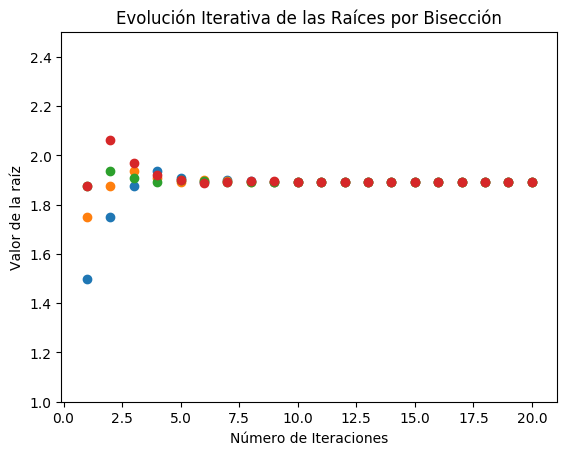

In [42]:
title("Evolución Iterativa de las Raíces por Bisección")
xlabel("Número de Iteraciones")
ylabel("Valor de la raíz")
ylim(1,2.5)
scatter(1:20,list9)
scatter(1:20,list10)
scatter(1:20,list11)
scatter(1:20,list12)
show();

In [43]:
#Listas enumeradas del 13 al 16, para evitar redefinir listas existentes. Estas son para los valores del error relativo
list13=errorbiseccion(0,2,20);
list14=errorbiseccion(1,2,20);
list15=errorbiseccion(1.5,2,20);
list16=errorbiseccion(1.5,3,20);

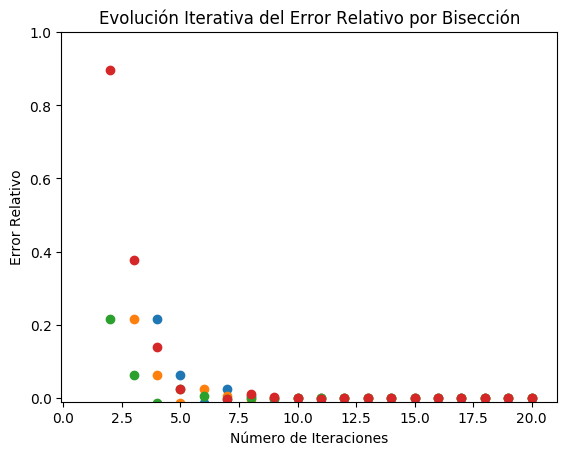

In [45]:
title("Evolución Iterativa del Error Relativo por Bisección")
xlabel("Número de Iteraciones")
ylabel("Error Relativo")
ylim(-0.01,1)
scatter(1:20,list13)
scatter(1:20,list14)
scatter(1:20,list15)
scatter(1:20,list16)
show();

A diferencia del método de Newton, por Bisección el número de iteraciones requeridas para lograr aproximar el valor real fue alrededor de $8$ mientras que por Newton $3$.

## Método de Newton para funciones arbitrarias

Ahora daremos un programa con el cuál podamos dar la función, su derivada y la condición inicial para obtener raíces por el método de Newton. Este programa tendrá problemas en caso de tomar intervalos que contengan más de una raíz.

Comencemos agregando la paquetería "SymPy"

In [1]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
using SymPy

Declaramos las variable simbólica $x$

In [2]:
x=symbols("x")

x

In [3]:
#Declaramos la función metodo_newton, las variables a declarar son f,df funciones y x0 condicion inicial
function metodo_newton(f,df,x0)
    #Defino la función auxiliar h
    h(x)=f(x)/df(x)
    #Con ayuda de la función auxiliar h declaro la función n que es la que se usa para iterar por método de Newton
    n(x)=x-h(x)
    #Evaluo en la condición incial
    a=n(x0)
    #Ciclo for de 3 iteraciones (usando lo sugerido por los datos del procedimiento anterior)
    for i in 1:200
        #Redefine a evaluando con el valor previo de a
        a=n(a)
        #Fin de proceso
    end
    #Devolver valor calculado de a
    return a
#Fin de programa
end

metodo_newton (generic function with 1 method)

In [4]:
typeof(metodo_newton)

#metodo_newton

In [5]:
#Definimos la función
f(x)=x^3-x^2-x-1

f (generic function with 1 method)

In [6]:
#reiteramos que x es simbolo
x=symbols("x")

x

In [7]:
#Damos la derivada usando la función diff(f,x)
df=diff(f(x),x)

   2          
3*x  - 2*x - 1

In [8]:
#La convertimos en función de Julia
fjulia=lambdify(df,[x]);

  likely near In[8]:2
  likely near In[8]:2
  likely near In[8]:2
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


In [9]:
#Prueba
fjulia(0.1)

-1.17

In [10]:
#Evaluamos nuestra función
metodo_newton(f,fjulia,4)

1.8392867552141612

In [11]:
#Hemos garantizado que nuestra función dé un número y no un SymPy-
typeof(ans)

Float64

#### Evaluando intervalos

In [12]:
#Damos un arreglo de puntos tipo linspace
x0=linspace(1.5,2.5,10)

1.5:0.1111111111111111:2.5

In [13]:
#Evaluamos los elementos del intervalo en nuestra función
metodo_newton.(f,fjulia,x0)

10-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

In [14]:
#Hacemos una lista a partir de los valores arrojados
list=metodo_newton.(f,fjulia,x0)

10-element Array{Float64,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

In [15]:
t=[] #Declaramos el arreglo t

0-element Array{Any,1}

In [16]:
length(list) #La función length nos ayuda a saber la cantidad de elementos en la lista definida 'list'

10

In [17]:
#Declaramos la función revision_epsilon con las siguientes variables:
#l es la lista a revisar
#c es la longitud de dicha lista, se puede saber si aplicamos length()
#epsilon es la vecindad alrededor de la raíz r que consideramos aceptable
function revision_epsilon(l,c,epsilon)
    r=(1/3)*(1+(19-3*sqrt(33))^(1/3)+(19+3*sqrt(33))^(1/3)) #El valor de la raíz según wolframalpha
    for i in 1:c #Ciclo for, se hará hasta revisar toda la lista
            if abs(l[i]-r)<epsilon #Condicional que se ejecuta si la diferencia entre el valor real y el aproximado en la posición i de la lista es menor que la epsilon dada a la función
                push!(t,l[i]) #Cumple? lo agregamos a la lista
            end 
    end
    return t #Regresa la lista con los valores aprobados
end

revision_epsilon (generic function with 1 method)

In [18]:
#Prueba
revision_epsilon(list,10,1)

10-element Array{Any,1}:
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929
 1.83929

Ahora hagamos esto pero con una función que solo necesite la función a evaluar más la condición inicial

In [24]:
#Declaramos la función metodo_newton, las variables a declarar son f,df funciones y x0 condicion inicial
function metodo_newton_funcion(f,x0)
    #Usando SymPy
    x=symbols("x")
    df=diff(f(x),x)
    #Conversion a Julia
    fjulia=lambdify(df,[x]);
    #---Proceso anterior
    #Defino la función auxiliar h
    h(x)=f(x)/fjulia(x)
    #Con ayuda de la función auxiliar h declaro la función n que es la que se usa para iterar por método de Newton
    n(x)=x-h(x)
    #Evaluo en la condición incial
    a=n(x0)
    #Ciclo for de 3 iteraciones (usando lo sugerido por los datos del procedimiento anterior)
    for i in 1:200
        #Redefine a evaluando con el valor previo de a
        a=n(a)
        #Fin de proceso
    end
    #Devolver valor calculado de a
    return a
#Fin de programa
end

metodo_newton_funcion (generic function with 1 method)

In [25]:
f(x)=x^3-x^2-x-1

f (generic function with 1 method)

In [27]:
#prueba
metodo_newton_funcion(f,2)

1.8392867552141612

FIN